In [3]:
# ChromeDriver 자동 설치 모듈
import chromedriver_autoinstaller
# Chrome을 제어하기 위한 객체
from selenium import webdriver
# Chrome이 웹 페이지 로딩을 완료 할 때까지 최대 n초간 대기하는 기능.
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
from pandas import DataFrame
from selenium.webdriver.support.ui import Select
# 파이썬 프로그램에 지정된 시간동안 랙을 거는 기능을 위해 사용
import time
import datetime as dt
import os
import shutil
from pandas import read_excel
from pandas import concat
from pandas import merge
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [298]:
chromedriver_autoinstaller.install()

'c:\\users\\ezen\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\chromedriver_autoinstaller\\90\\chromedriver.exe'

In [299]:
# 크롬드라이버 실행
driver = webdriver.Chrome()

# 크롬브라우저가 준비될 때 까지 최대 5초씩 대기
driver.implicitly_wait(5)

In [300]:
driver.get('https://www.airkorea.or.kr/web/sidoQualityCompare?itemCode=10008&pMENU_NO=102')
time.sleep(3)

In [301]:
html = driver.page_source
#print(html)

In [1]:
month_list = []
excel_list = []
now_month = dt.datetime.now().strftime("%Y%m")

for i in range(0,3):
    month_list.append(int(now_month) - i)
    
대기정보df = DataFrame()
    
for i in month_list:
    select = Select(driver.find_element_by_css_selector('select[id="month"]'))
    select.select_by_value('%s' %str(i))

    login_button = WebDriverWait(driver, 3).until(
                    lambda x: x.find_element_by_css_selector(".xls"))
    login_button.click()
    time.sleep(1)
    
    excel_list.append('sidoAirInfo_%s.xls' %str(i))
    shutil.copy('C:/Users/EZEN/Downloads/sidoAirInfo.xls', 'sidoAirInfo_%s.xls' %str(i))
    os.remove('C:/Users/EZEN/Downloads/sidoAirInfo.xls')
    
    xlsx = read_excel('sidoAirInfo_%s.xls' %str(i), skiprows = 3)
    tmp_df = DataFrame(xlsx)
    대기정보df = concat([대기정보df, tmp_df])

NameError: name 'np' is not defined

In [304]:
대기정보df = 대기정보df.set_index('날짜')
대기정보df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
날짜,,,,,,,,,,,,,,,,,
2021-05-26,15,13,17,16,17,13,14,16,10,13,16,14,15,13,12,13,12
2021-05-25,26,25,25,25,33,32,26,28,25,31,29,32,25,28,22,29,20
2021-05-24,33,19,28,29,26,28,23,36,24,34,36,31,21,25,21,15,25
2021-05-23,21,24,24,24,19,18,26,21,19,20,22,21,20,21,23,11,18
2021-05-22,15,12,16,13,13,13,16,14,13,17,14,13,11,15,13,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,23,18,23,26,17,22,22,25,14,27,29,25,13,18,17,13,28
2021-03-04,27,16,25,26,18,17,18,28,19,24,24,20,11,18,16,8,25
2021-03-03,23,12,20,25,20,15,12,25,14,19,25,18,12,13,12,9,20


In [305]:
대기정보df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
날짜,,,,,,,,,,,,,,,,,
2021-05-26,15,13,17,16,17,13,14,16,10,13,16,14,15,13,12,13,12
2021-05-25,26,25,25,25,33,32,26,28,25,31,29,32,25,28,22,29,20
2021-05-24,33,19,28,29,26,28,23,36,24,34,36,31,21,25,21,15,25
2021-05-23,21,24,24,24,19,18,26,21,19,20,22,21,20,21,23,11,18
2021-05-22,15,12,16,13,13,13,16,14,13,17,14,13,11,15,13,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,23,18,23,26,17,22,22,25,14,27,29,25,13,18,17,13,28
2021-03-04,27,16,25,26,18,17,18,28,19,24,24,20,11,18,16,8,25
2021-03-03,23,12,20,25,20,15,12,25,14,19,25,18,12,13,12,9,20


In [306]:
driver.get('https://www.weather.go.kr/weather/climate/past_cal.jsp')
time.sleep(3)

In [307]:
html = driver.page_source
#print(html)

In [311]:
month = dt.datetime.now().month
month

기온df = DataFrame()

for i in range(0,3):
    select = Select(driver.find_element_by_css_selector('select[id="observation_select3"]'))
    select.select_by_value('%s' %str(month-i))
    time.sleep(1)
    
    login_button = WebDriverWait(driver, 3).until(
                    lambda x: x.find_element_by_css_selector("input[class='btn']"))
    login_button.click()
    
    html = driver.page_source
    
    soup = BeautifulSoup(html, 'html.parser')
    
    thead = soup.select('.table_develop > tbody tr')
    
    for item in range(1, len(thead), 2):
        for target in thead[item].find_all('br'):
            target.replace_with("\\")
    temp_list = []

    for item in range(1, len(thead), 2):
            val = thead[item].text.strip()
            val = val.replace('℃','').replace('mm','').replace('-','0').split('\n')
            for i in val:
                tmp = i.split('\\')
                tmp_dic = {}
                for j in tmp:
                    tmp_dic[j[:4]] = j[5:]
                temp_list.append(tmp_dic)
    tmp_df = DataFrame(temp_list).sort_index(ascending = False)
    기온df = concat([기온df, tmp_df])
        
    time.sleep(1)
    
기온df

,평균기온,최고기온,최저기온,평균운량,일강수량,
26,NaN,NaN,NaN,NaN,NaN,
25,,23.0,11.5,0,0,
24,15.3,19.3,11.9,5.3,8.3,
23,19.4,24.5,16.4,3.3,0,
22,19.5,25.1,14.3,6.9,0,
...,...,...,...,...,...,...
4,9.0,16.2,3.0,1.3,0,
3,7.2,13.0,2.5,6.3,0,
2,4.4,9.9,01.2,4.5,0,
1,2.3,6.9,0.2,5.5,0.1,


In [317]:
기온df = 기온df.dropna(axis=0)
기온df['날짜'] = 대기정보df.index
기온df = 기온df.set_index('날짜')
기온df

,평균기온,최고기온,최저기온,평균운량,일강수량,
날짜,,,,,,
2021-05-26,,23.0,11.5,0,0,
2021-05-25,15.3,19.3,11.9,5.3,8.3,
2021-05-24,19.4,24.5,16.4,3.3,0,
2021-05-23,19.5,25.1,14.3,6.9,0,
2021-05-22,18.6,23.8,13.8,1.5,0.2,
...,...,...,...,...,...,...
2021-03-05,9.0,16.2,3.0,1.3,0,
2021-03-04,7.2,13.0,2.5,6.3,0,
2021-03-03,4.4,9.9,01.2,4.5,0,


In [320]:
기온df['평균기온']['2021-05-26'] = '0'

In [323]:
mdf = merge(대기정보df, 기온df, left_index = True, right_index = True).set_index('날짜')
mdf

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,...,경북,경남,제주,세종,평균기온,최고기온,최저기온,평균운량,일강수량,
날짜,,,,,,,,,,,,,,,,,,,,,
2021-05-26,15,13,17,16,17,13,14,16,10,13,...,13,12,13,12,0,23.0,11.5,0,0,
2021-05-25,26,25,25,25,33,32,26,28,25,31,...,28,22,29,20,15.3,19.3,11.9,5.3,8.3,
2021-05-24,33,19,28,29,26,28,23,36,24,34,...,25,21,15,25,19.4,24.5,16.4,3.3,0,
2021-05-23,21,24,24,24,19,18,26,21,19,20,...,21,23,11,18,19.5,25.1,14.3,6.9,0,
2021-05-22,15,12,16,13,13,13,16,14,13,17,...,15,13,11,12,18.6,23.8,13.8,1.5,0.2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,23,18,23,26,17,22,22,25,14,27,...,18,17,13,28,9.0,16.2,3.0,1.3,0,
2021-03-04,27,16,25,26,18,17,18,28,19,24,...,18,16,8,25,7.2,13.0,2.5,6.3,0,
2021-03-03,23,12,20,25,20,15,12,25,14,19,...,13,12,9,20,4.4,9.9,01.2,4.5,0,


In [324]:
mdf = mdf.apply(pd.to_numeric)

In [328]:
for i in mdf['평균기온']:
    if i == 0:
        mdf['평균기온'] = (mdf['최고기온'] + mdf['최저기온'])/2
        
mdf

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,...,경북,경남,제주,세종,평균기온,최고기온,최저기온,평균운량,일강수량,
날짜,,,,,,,,,,,,,,,,,,,,,
2021-05-26,15,13,17,16,17,13,14,16,10,13,...,13,12,13,12,17.25,23.0,11.5,0.0,0.0,NaN
2021-05-25,26,25,25,25,33,32,26,28,25,31,...,28,22,29,20,15.60,19.3,11.9,5.3,8.3,NaN
2021-05-24,33,19,28,29,26,28,23,36,24,34,...,25,21,15,25,20.45,24.5,16.4,3.3,0.0,NaN
2021-05-23,21,24,24,24,19,18,26,21,19,20,...,21,23,11,18,19.70,25.1,14.3,6.9,0.0,NaN
2021-05-22,15,12,16,13,13,13,16,14,13,17,...,15,13,11,12,18.80,23.8,13.8,1.5,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,23,18,23,26,17,22,22,25,14,27,...,18,17,13,28,9.60,16.2,3.0,1.3,0.0,NaN
2021-03-04,27,16,25,26,18,17,18,28,19,24,...,18,16,8,25,7.75,13.0,2.5,6.3,0.0,NaN
2021-03-03,23,12,20,25,20,15,12,25,14,19,...,13,12,9,20,5.55,9.9,1.2,4.5,0.0,NaN


Text(45, 15, 'f(x)=14.136537x+-0.023229')

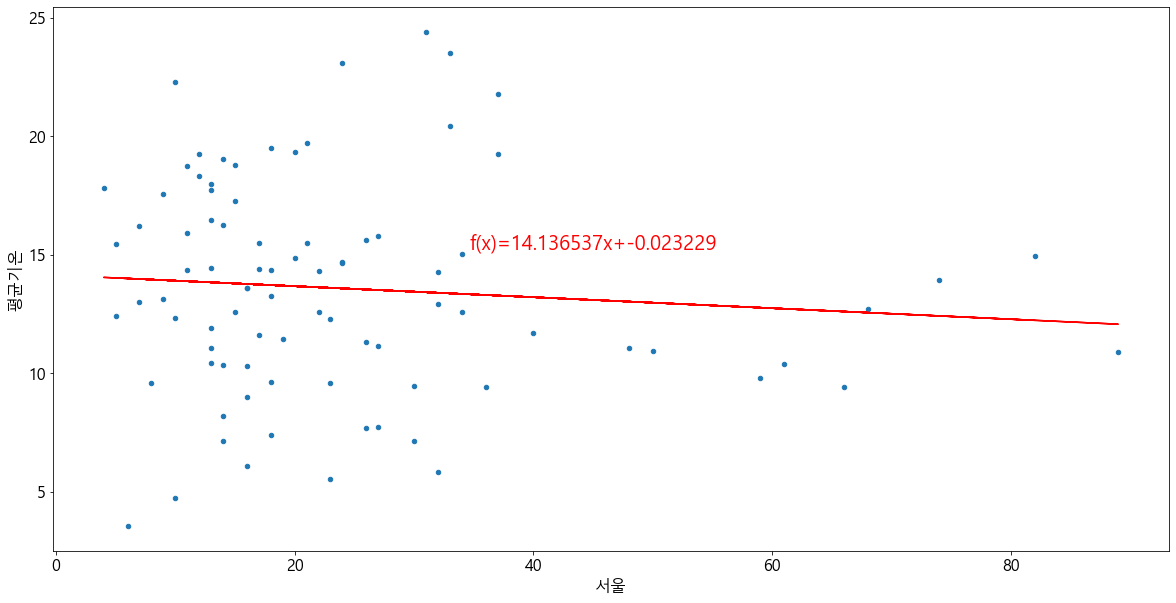

In [339]:

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

x = mdf['서울']
y = mdf['평균기온']
z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
f = np.poly1d(z)

mdf.plot.scatter(x = '서울',y = '평균기온')
plt.plot(x,f(x),'#ff0000')         # 추세선

plt.text(45, 15, "f(x)=%fx+%f" % (f[0], f[1]), fontsize=20, color='#ff0000', 
                    horizontalalignment='center', verticalalignment='bottom')